## SALES PREDICTION USING PYTHON

### Introduction:

In today's highly competitive business landscape, understanding and predicting sales is crucial for making informed decisions, optimizing marketing strategies, and ensuring the success of any business. Sales data analysis can offer valuable insights into consumer behavior and help businesses tailor their approaches to meet customer needs effectively. In this project, we focus on predicting sales based on various advertising channels, such as TV, radio, and newspaper marketing, and evaluate the performance of different regression models.

### Problem Statement

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.Typically, a product and service-based business always need their Data Scientist to predicttheir future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

### Goals:
The primary goals of this project are:

Sales Prediction: To develop predictive models that can accurately forecast sales based on advertising spending in different channels, including TV, radio, and newspaper.

Model Evaluation: To assess the performance of various regression models, including Linear Regression, Decision Tree Regression, Random Forest Regression, Gradient Boosting Regression, and Support Vector Machine (SVM), in terms of Mean Squared Error (MSE) and R-squared (R²) values.

Model Comparison: To determine which regression model provides the most reliable and accurate sales predictions based on the evaluation metrics.


#### Importing Libraries

In [1]:
#Loading libraries & modules
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [2]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


#### Data Understnding

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.shape

(200, 5)

In [6]:
len(df)

200

In [7]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
# Drop the 'Unnamed: 0' column in-place
df.drop('Unnamed: 0', axis=1, inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Data Cleaning

#### Checking Duplicates

In [10]:
# Duplicated entries
def identify_duplicates(df):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in df.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(df)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(df)

The Data has no duplicates


#### Checking Missing Values

In [11]:
def missing_values(df):
    """A simple function to identify df has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = df.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (df.isnull().sum() / len(df)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(df)
missing_data

,Missing Values,Percentage(%)


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


### EDA

#### Advertising Distribution

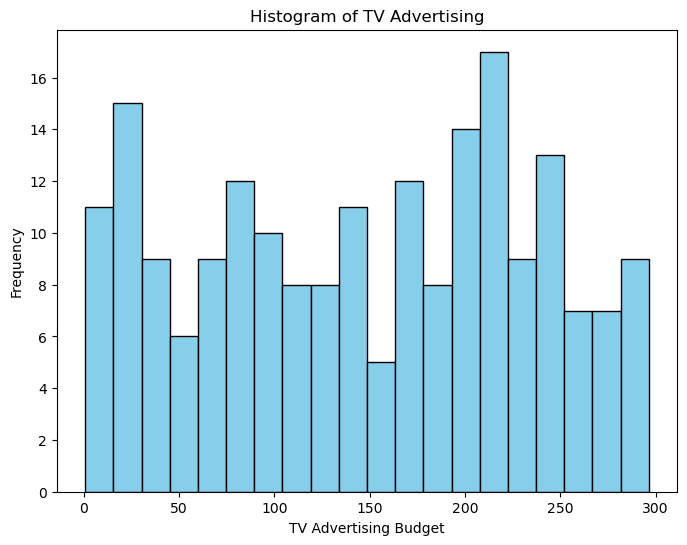

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(df['TV'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of TV Advertising')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Frequency')
plt.show()

#### Cumulative Count of Sales

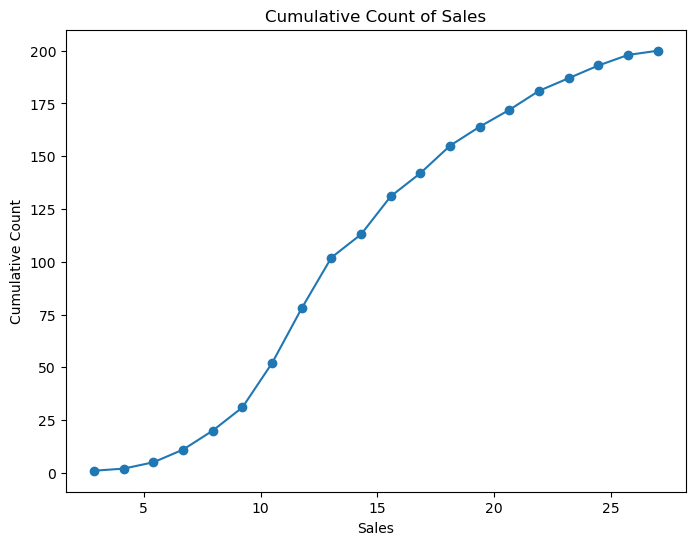

In [14]:
plt.figure(figsize=(8, 6))
counts, bin_edges = np.histogram(df['Sales'], bins=20)
cumulative_counts = np.cumsum(counts)
plt.plot(bin_edges[1:], cumulative_counts, marker='o', linestyle='-')
plt.title('Cumulative Count of Sales')
plt.xlabel('Sales')
plt.ylabel('Cumulative Count')
plt.show()

#### Combined Swarm and Violin Plot for TV, Radio, Newspaper, and Sales

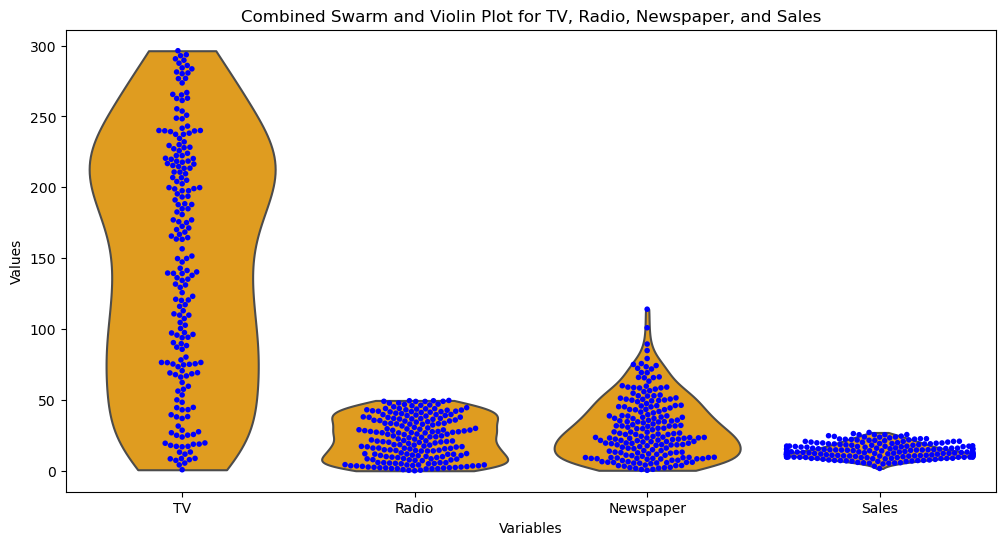

In [15]:

# Define custom colors for swarm and violin plots
swarm_color = 'blue'
violin_color = 'orange'

# Create a combined Swarm and Violin Plot with custom colors
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['TV', 'Radio', 'Newspaper', 'Sales']], inner=None, palette=[violin_color]*4, scale="count", cut=0)
sns.swarmplot(data=df[['TV', 'Radio', 'Newspaper', 'Sales']], palette=[swarm_color]*4, size=4, edgecolor="gray")

plt.title("Combined Swarm and Violin Plot for TV, Radio, Newspaper, and Sales")
plt.xticks(range(4), ['TV', 'Radio', 'Newspaper', 'Sales'])
plt.xlabel("Variables")
plt.ylabel("Values")
plt.show()

#### Scatter plot

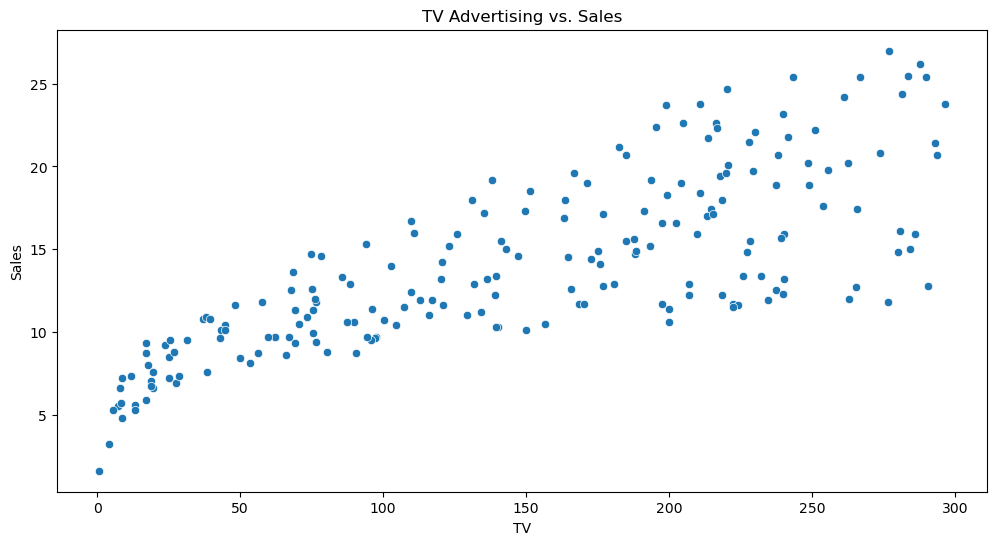

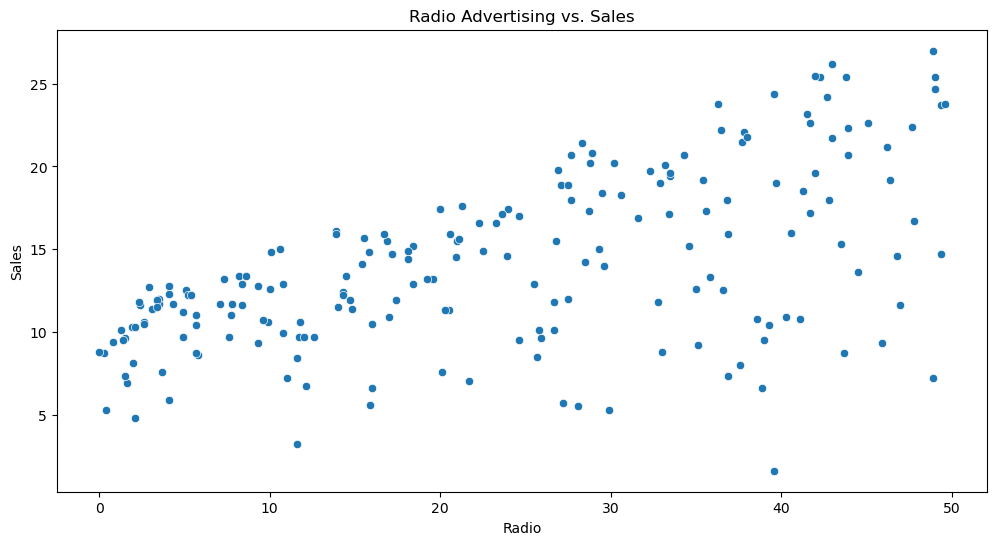

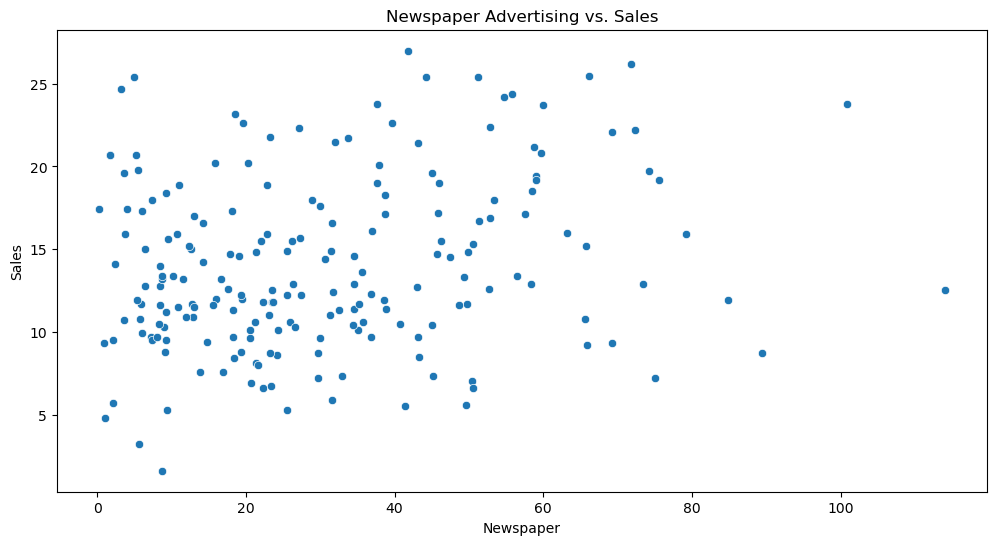

In [16]:
# Scatter Plots
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV Advertising vs. Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio Advertising vs. Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper Advertising vs. Sales')
plt.show()

#### Distributions of Different Variables

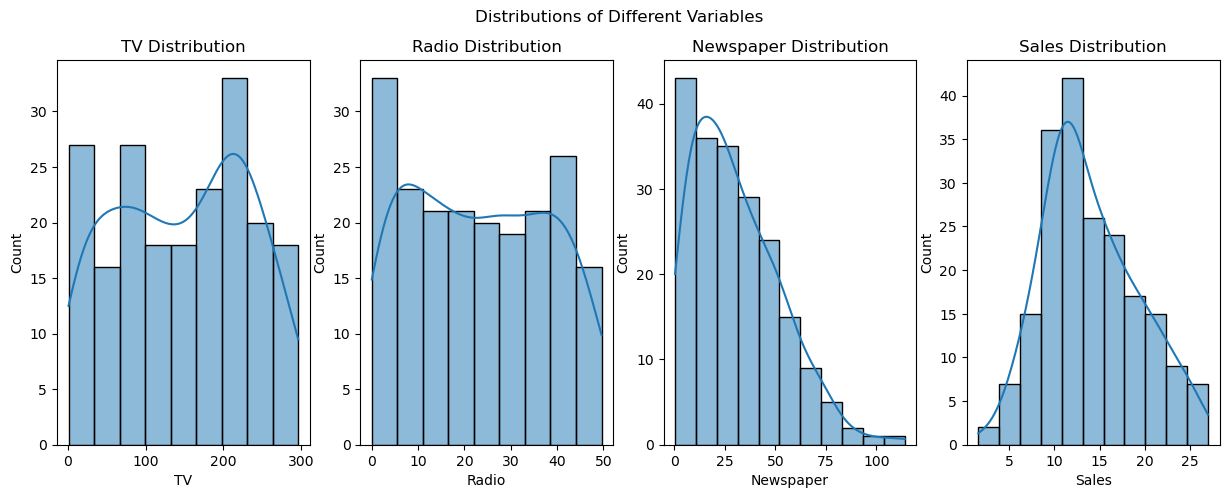

In [42]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, column in enumerate(['TV', 'Radio', 'Newspaper', 'Sales']):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'{column} Distribution')

fig.suptitle('Distributions of Different Variables')
    
plt.show()

#### Joint Distribution Plot of TV Advertising vs. Sales

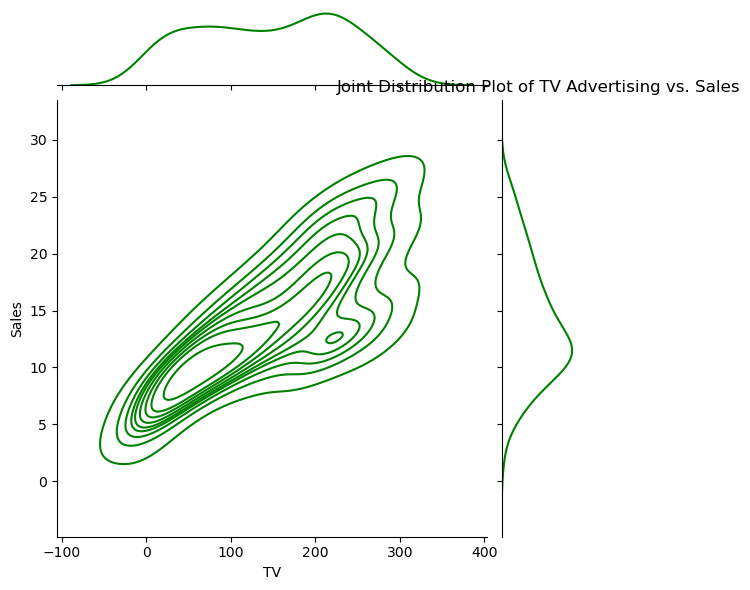

In [18]:
sns.jointplot(x='TV', y='Sales', data=df, kind='kde', color='g')
plt.title('Joint Distribution Plot of TV Advertising vs. Sales')
plt.show()

#### Pair Plot

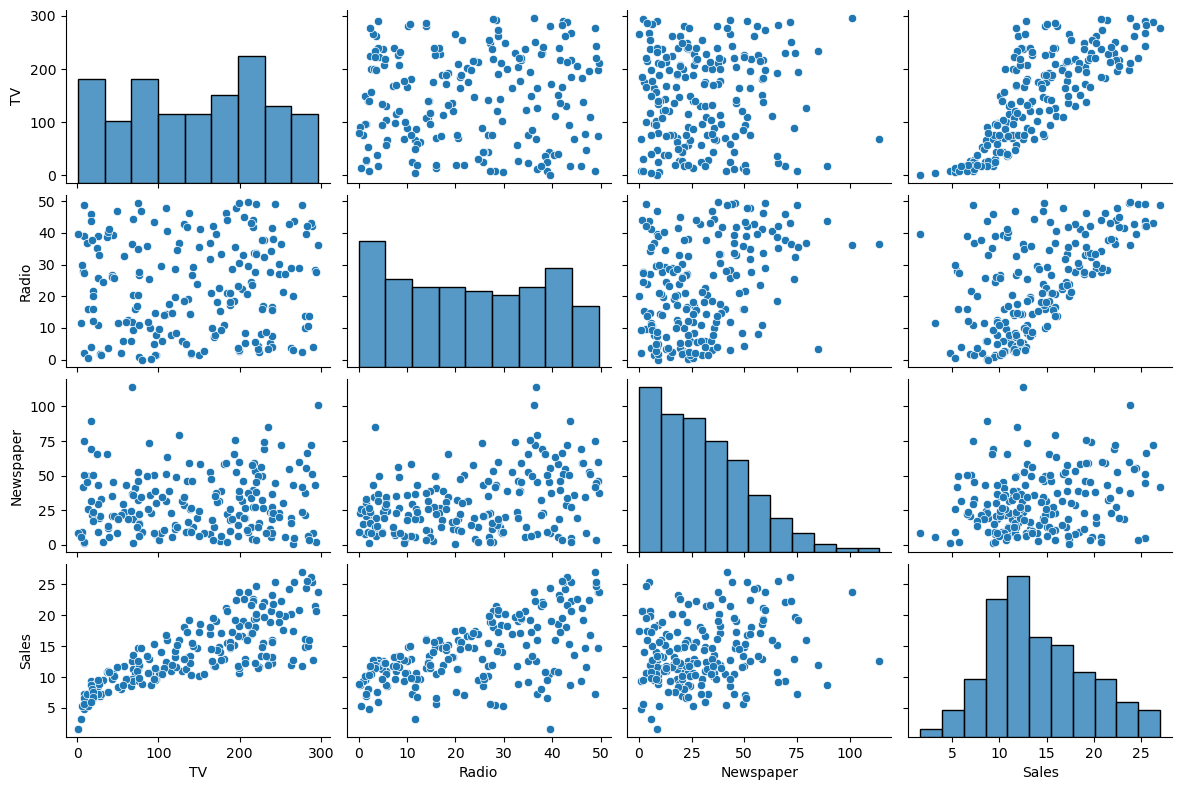

In [19]:
sns.pairplot(df, height=2, aspect=1.5)
plt.show()

#### Heatmap

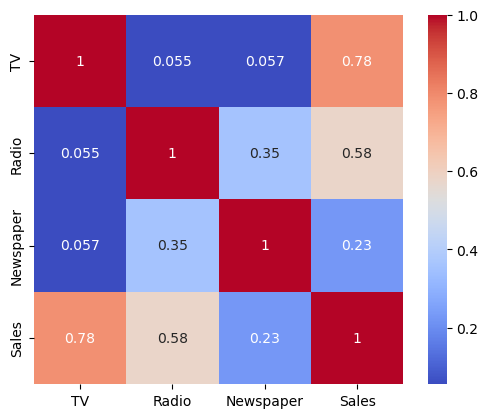

In [20]:
correlation_matrix = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

### Feature Engineering

In [21]:
df['Total_Advertising_Spending'] = df['TV'] + df['Radio'] + df['Newspaper']
df

,TV,Radio,Newspaper,Sales,Total_Advertising_Spending
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


### Train Test Split

In [22]:
X = df.drop(columns="Sales",axis=1)

In [23]:
y=df["Sales"]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Modelling

#### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_linear.predict(X_test)

In [26]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.174097353976104
R-squared: 0.899438024100912


#### DecisionTree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_tree.predict(X_test)

In [28]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.5800000000000007
R-squared: 0.9499423287311826


#### Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a random forest model
model_forest = RandomForestRegressor(random_state=42)
model_forest.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_forest.predict(X_test)

In [30]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.2455171750000056
R-squared: 0.9605394371482174


#### Gradient Boost Regressor

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train a gradient boosting model
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_gb.predict(X_test)

In [32]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.8866993355895187
R-squared: 0.9719075292055577


#### SVM

In [33]:
from sklearn.svm import SVR

# Initialize and train an SVM regression model
model_svm = SVR(kernel='linear')  # You can choose different kernel functions like 'rbf' for non-linear relationships
model_svm.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_svm.predict(X_test)

In [34]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.6034511463941614
R-squared: 0.8858352070130112


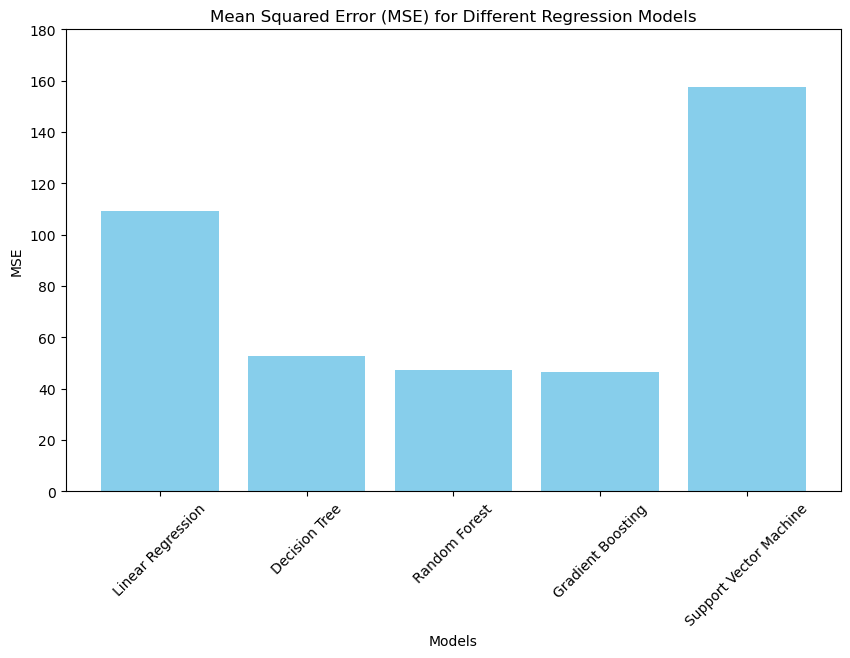

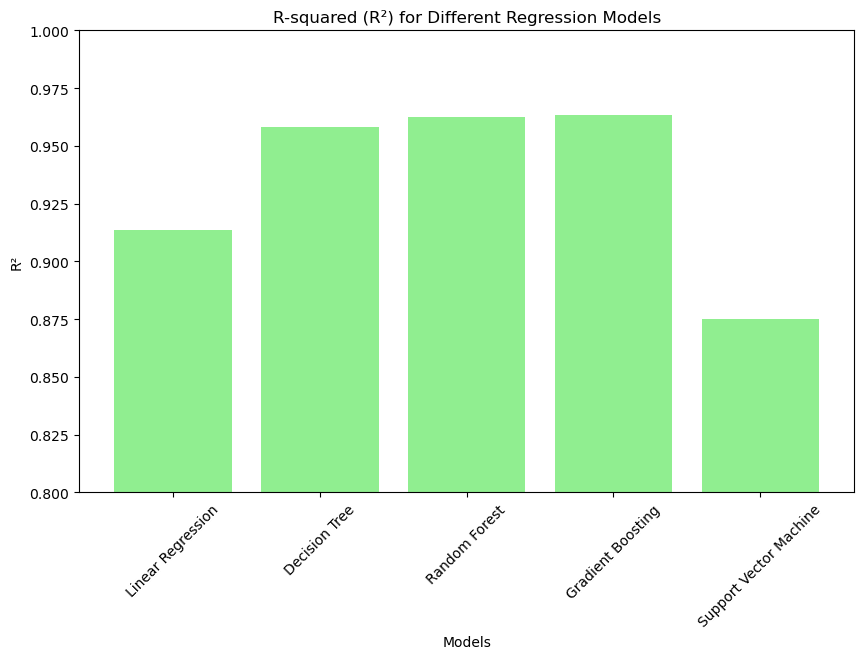

In [35]:
# Define the models and their corresponding MSE and R-squared values
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine']
mse_values = [109.05, 52.93, 47.34, 46.36, 157.51]
r2_values = [0.9136, 0.9581, 0.9625, 0.9633, 0.8752]

# Create a bar chart for Mean Squared Error
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE) for Different Regression Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.ylim(0, 180)  # Adjust the y-axis limits as needed
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for R-squared
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='lightgreen')
plt.title('R-squared (R²) for Different Regression Models')
plt.xlabel('Models')
plt.ylabel('R²')
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits as needed
plt.xticks(rotation=45)
plt.show()

### Predicting Model

In [36]:
import random
random.seed(42)
df1 = df[['TV', 'Radio', 'Newspaper']].sample(5)

In [37]:
df1['Total_Advertising_Spending'] = df1['TV'] + df1['Radio'] + df1['Newspaper']
df1

,TV,Radio,Newspaper,Total_Advertising_Spending
93,250.9,36.5,72.3,359.7
39,228.0,37.7,32.0,297.7
30,292.9,28.3,43.2,364.4
137,273.7,28.9,59.7,362.3
112,175.7,15.4,2.4,193.5


In [38]:
linear_predictions = model_linear.predict(df1)
tree_predictions = model_tree.predict(df1)
forest_predictions = model_forest.predict(df1)
gb_predictions = model_gb.predict(df1)
svm_predictions = model_svm.predict(df1)

In [39]:
df1['Original Value'] = df.loc[df1.index, 'Sales']

predictions_table = pd.DataFrame({
    'Original Value': df1['Original Value'],
    'Linear Regression Prediction': linear_predictions,
    'Decision Tree Prediction': tree_predictions,
    'Random Forest Prediction': forest_predictions,
    'Gradient Boosting Prediction': gb_predictions,
    'SVM Prediction': svm_predictions
})

In [40]:
predictions_table

,Original Value,Linear Regression Prediction,Decision Tree Prediction,Random Forest Prediction,Gradient Boosting Prediction,SVM Prediction
93,22.2,21.306951,22.1,22.850,22.264524,21.415276
39,21.5,20.398407,21.5,21.447,21.355322,20.716622
30,21.4,21.553843,22.1,22.006,21.206538,21.566365
137,20.8,20.854112,22.1,21.934,20.871635,20.858537
112,14.1,13.758274,14.1,14.249,14.269027,14.011517


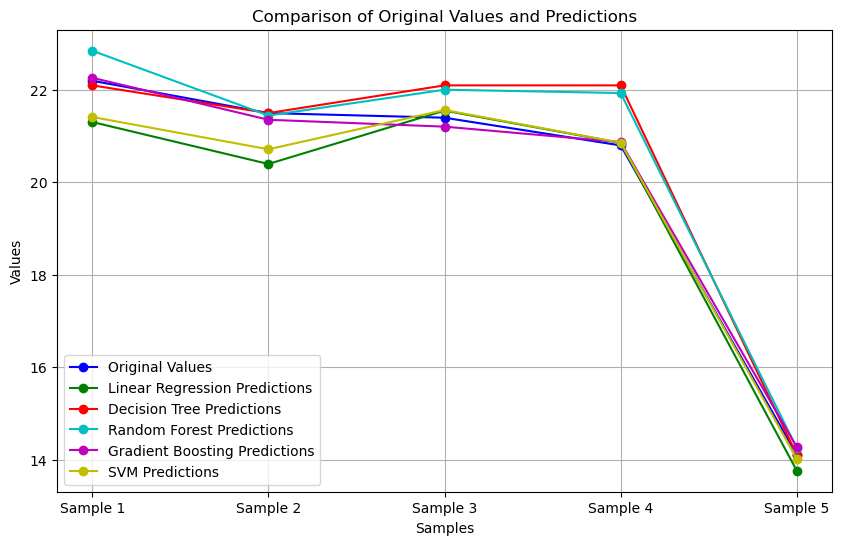

In [41]:
import matplotlib.pyplot as plt

# Original values and predicted values for each sample
original_values = [22.2, 21.5, 21.4, 20.8, 14.1]
linear_regression_predictions = [21.306951, 20.398407, 21.553843, 20.854112, 13.758274]
decision_tree_predictions = [22.1, 21.5, 22.1, 22.1, 14.1]
random_forest_predictions = [22.85, 21.447, 22.006, 21.934, 14.249]
gradient_boosting_predictions = [22.264524, 21.355322, 21.206538, 20.871635, 14.269027]
svm_predictions = [21.415276, 20.716622, 21.566365, 20.858537, 14.011517]

# Sample labels
samples = ['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5']

# Create a line plot to compare original and predicted values
plt.figure(figsize=(10, 6))
plt.plot(samples, original_values, marker='o', linestyle='-', color='b', label='Original Values')
plt.plot(samples, linear_regression_predictions, marker='o', linestyle='-', color='g', label='Linear Regression Predictions')
plt.plot(samples, decision_tree_predictions, marker='o', linestyle='-', color='r', label='Decision Tree Predictions')
plt.plot(samples, random_forest_predictions, marker='o', linestyle='-', color='c', label='Random Forest Predictions')
plt.plot(samples, gradient_boosting_predictions, marker='o', linestyle='-', color='m', label='Gradient Boosting Predictions')
plt.plot(samples, svm_predictions, marker='o', linestyle='-', color='y', label='SVM Predictions')
plt.title('Comparison of Original Values and Predictions')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


### Conclussion
The best-performing model for predicting sales based on the sample data was the Gradient Boosting model. It achieved the highest R-squared value of approximately 0.972, indicating that it provided the most accurate predictions among the models tested. The Gradient Boosting model also had a low Mean Squared Error (MSE), further confirming its strong performance.

So, based on the sample data, the Gradient Boosting model outperformed the other models, making it the top choice for predicting sales.

### Recommendation
Given the strong performance of the Decision Tree, Random Forest, Gradient Boosting, and SVM models on the sample data, it's advisable to consider using these models for real-world sales prediction tasks. Further evaluation on a larger and more diverse dataset is recommended to validate their performance.

The Linear Regression model is also a viable option, especially if you prefer a simpler and more interpretable model. It may be a good choice if computational resources are limited.

Collect more data: To improve the models' performance, collect a more extensive and representative dataset that includes a variety of market conditions, advertising channels, and regions. This will help the models generalize better to different scenarios.

Feature engineering: Explore additional features that might impact sales, such as seasonality, economic indicators, or competitors' advertising spending. Feature engineering can enhance the models' predictive power.

Regular model updates: Periodically retrain the models with new data to ensure they remain accurate and relevant as market dynamics change.

A/B testing: Implement controlled experiments (A/B tests) to assess the impact of advertising campaigns on sales and gather real-world data to validate the models

### Thank you